<a href="https://colab.research.google.com/github/JD32919/EDA/blob/main/Examen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


 ** Define las funciones en términos de 'x': (Ejemplos: 'x*2', 'np.sin(x)', 'np.exp(x)', etc. *** 

 ► Ingrese la función f(x): x**2

 ► Ingrese la función g(x): np.cos(x)

 ► Ingrese el límite inferior del intervalo (a): 1

 ► Ingrese el límite superior del intervalo (b): 4

-------------------------------------------------------------------------
Seleccione el cálculo a realizar:
 1.- Área bajo la curva de f(x)
 2.- Área entre las curvas f(x) y g(x)
 3.- Área total acotada entre f(x) y g(x)
 4.- Volumen del sólido por el método de discos
 5.- Volumen del sólido por el método de arandelas
----------------------------------------------------------------------------

 ► Ingrese el número de la operación deseada: 4

● Volumen del sólido de revolución de f(x) en el intervalo [1.0, 4.0] es: 642.770 u³



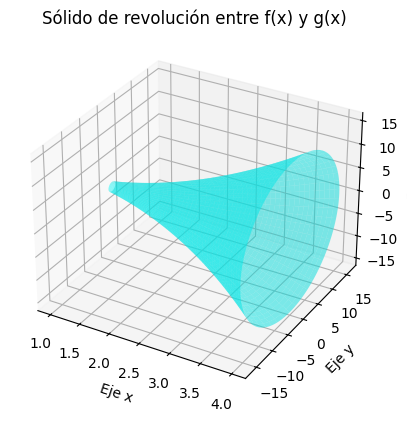

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Solicita al usuario la definición de las funciones y el intervalo
def solicitar_funciones():
    print("\n ** Define las funciones en términos de 'x': (Ejemplos: 'x*2', 'np.sin(x)', 'np.exp(x)', etc. *** ")

    f_expr = input("\n ► Ingrese la función f(x): ")
    g_expr = input("\n ► Ingrese la función g(x): ")
    a = float(input("\n ► Ingrese el límite inferior del intervalo (a): "))
    b = float(input("\n ► Ingrese el límite superior del intervalo (b): "))

    def f(x):
        return eval(f_expr)

    def g(x):
        return eval(g_expr)

    return f, g, a, b

# Función para calcular el área bajo la curva
def area_bajo_curva(f, a, b, n):
    delta_x = (b - a) / n
    x_values = np.linspace(a, b, n + 1)
    y_values = f(x_values)
    area = 0

    for i in range(n):
        area += y_values[i] * delta_x  # Usando el lado izquierdo del rectángulo

    # Graficamos
    plt.figure(figsize=(8, 6))
    plt.plot(x_values, y_values, label='Función f(x)', color='blue')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title(f'Aproximación del área bajo la curva con {n} rectangulos')

    # Grafica rectangulos
    for i in range(n):
        x = [x_values[i], x_values[i], x_values[i + 1], x_values[i + 1], x_values[i]]
        y = [0, y_values[i], y_values[i], 0, 0]
        plt.fill(x, y, alpha=0.3, color='orange')

    return area

# Función para calcular el área entre curvas
def area_entre_curvas(f1, f2, a, b, n):
    delta_x = (b - a) / n
    x_values = np.linspace(a, b, n + 1)
    y_values1 = f1(x_values)
    y_values2 = f2(x_values)
    area = 0

    for i in range(n):
        area += abs(y_values1[i] - y_values2[i]) * delta_x

    plt.figure(figsize=(8, 6))
    plt.plot(x_values, y_values1, label='Función f(x)', color='blue')
    plt.plot(x_values, y_values2, label='Función g(x)', color='red')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title(f'Aproximación del área entre curvas con {n} rectangulos')

    for i in range(n):
        x = [x_values[i], x_values[i], x_values[i + 1], x_values[i + 1], x_values[i]]
        y = [y_values2[i], y_values1[i], y_values1[i], y_values2[i], y_values2[i]]
        plt.fill(x, y, alpha=0.3, color='orange')
    return area

# Nueva función para calcular el área total acotada entre dos curvas
def area_total_acotada(f1, f2, a, b, n):
    delta_x = (b - a) / n
    x_values = np.linspace(a, b, n + 1)
    y_values1 = f1(x_values)
    y_values2 = f2(x_values)
    area = 0

    for i in range(n):
        area += abs(y_values1[i] - y_values2[i]) * delta_x

    plt.figure(figsize=(8, 6))
    plt.plot(x_values, y_values1, label='Función f(x)', color='blue')
    plt.plot(x_values, y_values2, label='Función g(x)', color='red')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title(f'Área total acotada entre f(x) y g(x) con {n} rectangulos')

    for i in range(n):
        x = [x_values[i], x_values[i], x_values[i + 1], x_values[i + 1], x_values[i]]
        y = [y_values2[i], y_values1[i], y_values1[i], y_values2[i], y_values2[i]]
        plt.fill(x, y, alpha=0.3, color='green')
    return area

# Funciones de volumen
def volumen_discos(f, a, b, n=1000):
    x = np.linspace(a, b, n)
    y = f(x)
    volumen = np.pi * np.trapz(y**2, x)
    return volumen

def volumen_arandelas(f1, f2, a, b, n=1000):
    x = np.linspace(a, b, n)
    y1 = f1(x)
    y2 = f2(x)
    volumen = np.pi * np.trapz(y1**2 - y2**2, x)
    return volumen

def grafica_volumen_3d(f1, f2, a, b, n=1000):
    x = np.linspace(a, b, n)
    y1 = f1(x)
    y2 = f2(x)
    theta = np.linspace(0, 2 * np.pi, n)
    X, Theta = np.meshgrid(x, theta)

    Y1 = f1(X)
    Y2 = f2(X)

    X1 = X
    Z1 = Y1 * np.cos(Theta)
    Y1_revol = Y1 * np.sin(Theta)

    X2 = X
    Z2 = Y2 * np.cos(Theta)
    Y2_revol = Y2 * np.sin(Theta)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X1, Y1_revol, Z1, color='cyan', alpha=0.5)
    ax.plot_surface(X2, Y2_revol, Z2, color='orange', alpha=0.5)
    ax.set_title(f'Sólido de revolución entre f(x) y g(x)')
    ax.set_xlabel('Eje x')
    ax.set_ylabel('Eje y')
    ax.set_zlabel('Eje z')
    plt.show()

# Solicitar al usuario el cálculo deseado y mostrar resultados
f, g, a, b = solicitar_funciones()

# Muestra el menú de opciones
print("\n-------------------------------------------------------------------------")
print("Seleccione el cálculo a realizar:")
print(" 1.- Área bajo la curva de f(x)")
print(" 2.- Área entre las curvas f(x) y g(x)")
print(" 3.- Área total acotada entre f(x) y g(x)")
print(" 4.- Volumen del sólido por el método de discos")
print(" 5.- Volumen del sólido por el método de arandelas")
print("----------------------------------------------------------------------------")

opcion = input("\n ► Ingrese el número de la operación deseada: ").strip()

# Realiza el cálculo seleccionado y muestra resultados y visualización
if opcion == '1':
    n = int(input("\n   ▷ Ingresa el valor de rectángulos deseados: "))
    area = area_bajo_curva(f, a, b, n)
    print(f'\n● Área bajo la curva de f(x) en el intervalo [{a}, {b}] es: {area:.3f} u² \n')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.grid(True)
    plt.legend()
    plt.show()

elif opcion == '2':
    n = int(input("\n   ▷ Ingresa el valor de rectángulos deseados: "))
    area = area_entre_curvas(f, g, a, b, n)
    print(f'\n● Área entre f(x) y g(x) en el intervalo [{a}, {b}] es: {area:.3f} u² \n')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.grid(True)
    plt.legend()
    plt.show()

elif opcion == '3':
    n = int(input("\n   ▷ Ingresa el valor de rectángulos deseados: "))
    area = area_total_acotada(f, g, a, b, n)
    print(f'\n● Área total acotada entre f(x) y g(x) en el intervalo [{a}, {b}] es: {area:.3f} u² \n')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.grid(True)
    plt.legend()
    plt.show()

elif opcion == '4':
    volumen = volumen_discos(f, a, b)
    print(f'\n● Volumen del sólido de revolución de f(x) en el intervalo [{a}, {b}] es: {volumen:.3f} u³\n')
    grafica_volumen_3d(f, lambda x: 0, a, b)  # Llama a la función de gráfica en 3D
    plt.show()

elif opcion == '5':
    volumen = volumen_arandelas(f, g, a, b)
    print(f'\n● Volumen del sólido de revolución entre f(x) y g(x) en el intervalo [{a}, {b}] es: {volumen:.3f} u³\n')
    grafica_volumen_3d(f, g, a, b)
else:
    print("\n ** Opción no válida. Por favor, ingresa un número entre 1 y 5. **")
